In [1]:
# Ipython Notebook
# Carolina Monzo - 16-10-2018
# Tests to create plots for VLT-Tesis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

## 119 samples

In [26]:
# Read pandas dataframe from the tsv we created
header = ["Sample", "dp5", "dp10", "dp15", "dp20", "dp25", "dp30", "dp35", "dp40", "dp45", "dp50", "mean"]
df = pd.read_csv("vlt_samples/vlt_probes.tsv", names=header, index_col="Sample", sep='\t')
df.head()
df2 = pd.read_csv("vlt_samples/vlt_exons.tsv", names=header, index_col='Sample', sep='\t')
df3 = pd.read_csv("vlt_samples/vlt_exo-probe.tsv", names=header, index_col = 'Sample', sep='\t')

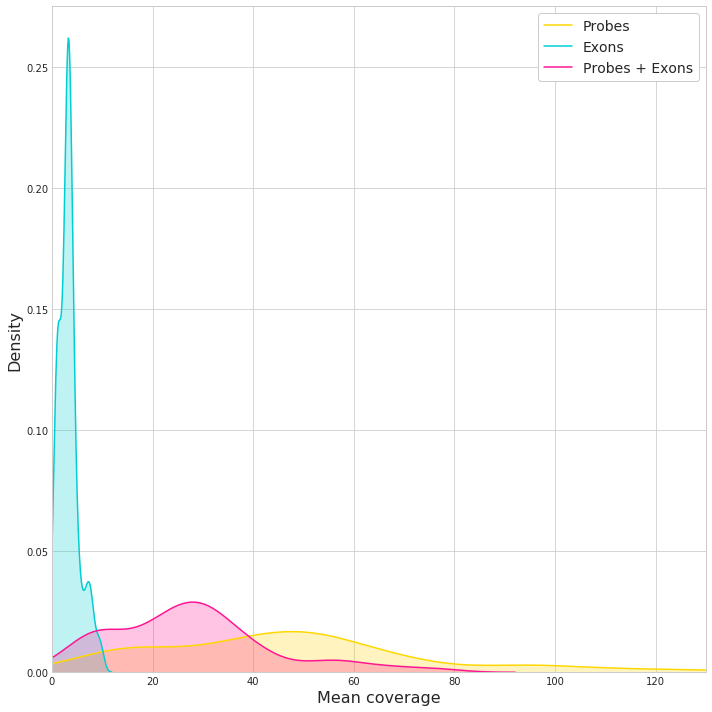

In [4]:
# Plot density for each study
fig = plt.figure(figsize=(10,10))

sns.kdeplot(df["mean"], shade=True, label="Probes", color="gold")
sns.kdeplot(df2["mean"], shade=True, label="Exons", color="darkturquoise")
sns.kdeplot(df3["mean"], shade=True, label="Probes + Exons", color="deeppink")
#sns.kdeplot(df["dp5"], shade=True)
plt.xlim(0, df["mean"].max())
plt.xlabel("Mean coverage", fontsize = 16)
plt.ylabel("Density", fontsize = 16)
#The y-axis in a density plot is the probability density function for the kernel density estimation.
leg = plt.legend(fontsize = 14, framealpha = 1, frameon = True)
plt.tight_layout()
plt.savefig("vlt_samples/density_coverage_119.png")
plt.show()
plt.close(fig)

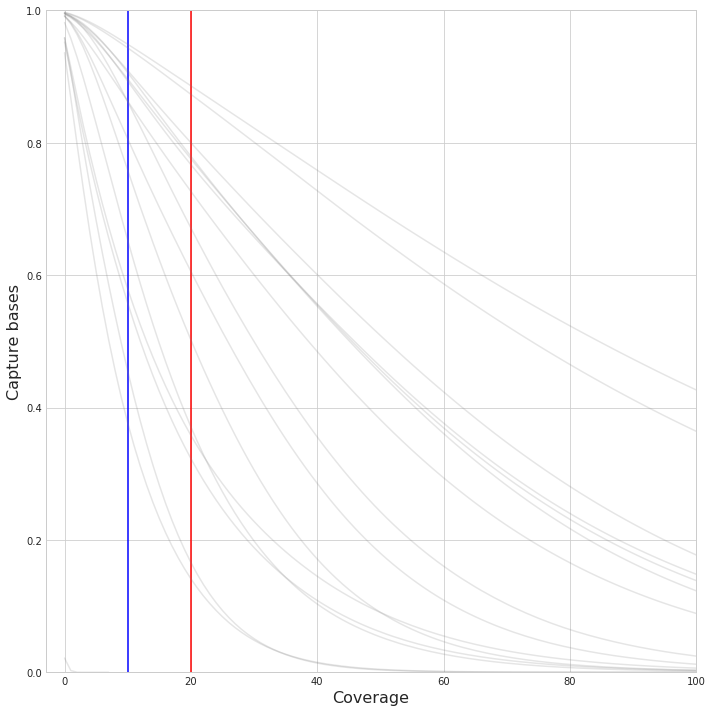

In [10]:
# Get list of bedtools output files we want to plot
with open("groupD-hist.fof", "r") as fi:
    files = fi.read().splitlines()
    
# Create labels removing the end
labels = [e.split(".")[0] for e in files]

# Get coverage and cumulative coverage for each file and read data into the lists
cov = []
cov_cumul = []

for i in range(0, len(files)):
    
    dfN = pd.read_csv(files[i], sep='\t', names = ["all", "num", "st", "en", "value"])
    dfN["value"] = dfN["value"].map(lambda x: '{:.7f}'.format(x)).astype('float')
    
    cov.append(dfN)

    cov_cumul.append(1 - cov[i]["value"].cumsum())

# Establish general grid
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.xlabel("Coverage", fontsize = 16)
plt.ylabel("Capture bases", fontsize = 16)
ax.vlines(x=10, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='blue')
ax.vlines(x=20, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='red')
plt.ylim(0, 1.0)
plt.xlim(-3, 100)
# Plot the data

for i in range(0, len(cov)):
    #ax.plot(cov[i][2:401,2], cov_cumul[i][1:400], color='gray')

    ax.plot(cov[i]["num"], cov_cumul[i], color = 'gray', alpha = 0.2)
    
#ax.plot(cov[i]["num"], sum(cov_cumul)/float(len(cov_cumul)), color = 'red')
plt.tight_layout()
plt.savefig("vlt_samples/probes_groupD_amplitud.png")
plt.show()
plt.close()

In [11]:
print(f"Mean of 119 probes all: {df['mean'].mean()}")
print(f"Std of 119 probes all: {df['mean'].std()}")
print(f"Mean of 119 exons all: {df2['mean'].mean()}")
print(f"Std of 119 exons all: {df2['mean'].std()}")
print(f"Mean of 119 exo-probes all: {df3['mean'].mean()}")
print(f"Std of 119 exo-probes all: {df3['mean'].std()}")

Mean of 119 probes all: 46.73680155714286
Std of 119 probes all: 27.20228539922521
Mean of 119 exons all: 3.3382586984033633
Std of 119 exons all: 2.0164366233864253
Mean of 119 exo-probes all: 27.522773872941183
Std of 119 exo-probes all: 16.04287752501634


In [12]:
# Get stats for all groups
# Read pandas dataframe from the tsv we created
header = ["Sample", "dp5", "dp10", "dp15", "dp20", "dp25", "dp30", "dp35", "dp40", "dp45", "dp50", "mean"]
df_pA = pd.read_csv("vlt_samples/groupA_probes.tsv", names=header, index_col="Sample", sep='\t')
df_pB = pd.read_csv("vlt_samples/groupB_probes.tsv", names=header, index_col="Sample", sep='\t')
df_pC = pd.read_csv("vlt_samples/groupC_probes.tsv", names=header, index_col="Sample", sep='\t')
df_pD = pd.read_csv("vlt_samples/groupD_probes.tsv", names=header, index_col="Sample", sep='\t')
df_eA = pd.read_csv("vlt_samples/groupA_exons.tsv", names=header, index_col="Sample", sep='\t')
df_eB = pd.read_csv("vlt_samples/groupB_exons.tsv", names=header, index_col="Sample", sep='\t')
df_eC = pd.read_csv("vlt_samples/groupC_exons.tsv", names=header, index_col="Sample", sep='\t')
df_eD = pd.read_csv("vlt_samples/groupD_exons.tsv", names=header, index_col="Sample", sep='\t')
df_epA = pd.read_csv("vlt_samples/groupA_exo-prob.tsv", names=header, index_col="Sample", sep='\t')
df_epB = pd.read_csv("vlt_samples/groupB_exo-prob.tsv", names=header, index_col="Sample", sep='\t')
df_epC = pd.read_csv("vlt_samples/groupC_exo-prob.tsv", names=header, index_col="Sample", sep='\t')
df_epD = pd.read_csv("vlt_samples/groupD_exo-prob.tsv", names=header, index_col="Sample", sep='\t')

In [32]:
df_pA.describe().to_csv("vlt_samples/groupA_stats.tsv", sep='\t')
df_pB.describe().to_csv("vlt_samples/groupB_stats.tsv", sep='\t')
df_pC.describe().to_csv("vlt_samples/groupC_stats.tsv", sep='\t')
df_pD.describe().to_csv("vlt_samples/groupD_stats.tsv", sep='\t')

In [24]:
df_epD.describe()

,dp5,dp10,dp15,dp20,dp25,dp30,dp35,dp40,dp45,dp50,mean
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.528822,0.446968,0.383105,0.331873,0.289993,0.255058,0.225354,0.199773,0.177520,0.158084,24.046853
std,0.162187,0.167629,0.173321,0.175630,0.174437,0.170589,0.164951,0.158205,0.150775,0.143025,18.321201
min,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014262
25%,0.475828,0.355297,0.270502,0.208371,0.158482,0.115867,0.084367,0.062424,0.046301,0.034248,11.271550
50%,0.590512,0.516868,0.446271,0.382288,0.324614,0.272822,0.226642,0.186281,0.151499,0.122094,19.815600
75%,0.618989,0.562971,0.514226,0.470202,0.428947,0.390790,0.355125,0.322547,0.292542,0.263913,32.685200
max,0.662884,0.620162,0.587452,0.558661,0.532169,0.507358,0.483725,0.461084,0.439218,0.418105,65.874800


In [28]:
df = pd.read_csv("vlt_samples/vlt_probes.tsv", names=header, sep='\t')
df.head()
df2 = pd.read_csv("vlt_samples/vlt_exons.tsv", names=header, sep='\t')
df3 = pd.read_csv("vlt_samples/vlt_exo-probe.tsv", names=header, sep='\t')

In [29]:
dfnew = pd.DataFrame()
dfnew["probes"] = df["mean"]
dfnew["exons"] = df2["mean"]
dfnew["exo-prob"] = df3["mean"]
dfnew.head()

,probes,exons,exo-prob
0,19.5542,2.05495,11.53000
1,16.2051,4.54600,9.42874
2,14.5177,3.62075,8.42407
3,10.4207,4.12140,6.17973
4,15.2378,3.42586,8.94349


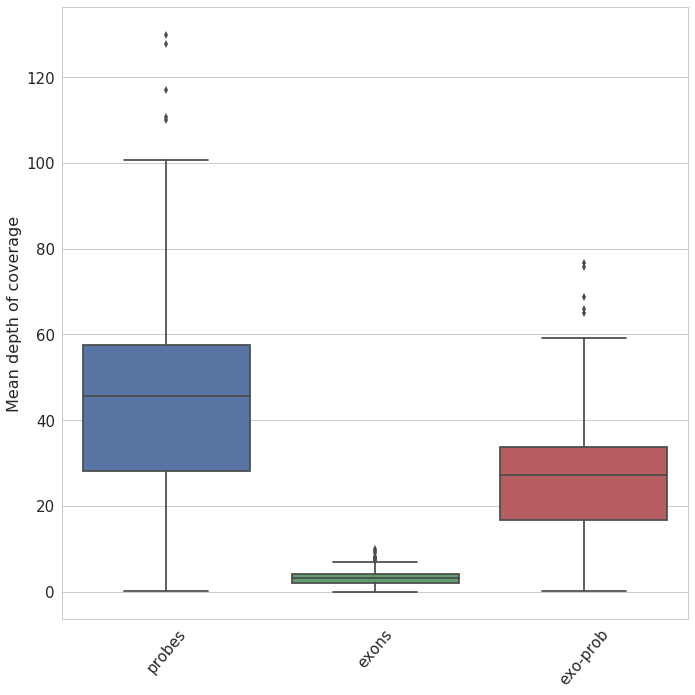

In [30]:
# Plot density for each study
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=1.5, style='whitegrid')
sns.boxplot(data=dfnew)
#plt.boxplot(df2["mean"])
#plt.boxplot(df3["mean"])
#plt.xlabel("Samples", fontsize = 16)
plt.ylabel("Mean depth of coverage", fontsize = 16)
plt.xticks(rotation=50)
plt.tight_layout()
plt.savefig("vlt_samples/mean_depth.png")
plt.show()
plt.close(fig)